<font size="8"> **So you want to play with simulated PACE OCI data?** <br>
<font size="6"> Follow along to learn how!

<font size="5"> This notebook is designed for a novice Python user to download, open, and plot simulated **Level-3 Mapped** OCI data. 
<font color='red'> <br> <font size="4"> PLESE NOTE: The simulated PACE data is realistic, flight-like data but may have some discrepencies from the real PACE data we obtain after launch.

# Step 1: Downloading Simulated Level 3 PACE data

<font size="4"> Navigate to https://oceancolor.gsfc.nasa.gov/data/pace/test-data/. <br> Select 'Level-3 Mapped', select '2022/', then '21 Mar 2022 (080)' <br> Select the file '*PACE_OCI_SIM.20220321.L3m.DAY.OC_BGC_CHL.V9.1.chlor_a.4km.nc'* and save it to a local directory

<font size="4"> For this tutorial, we are using Level-2 products, which are distributed in Network Common Data Form, version 4 (netcdf4) files. 

Resources:
- [Descriptions of NASA data processing levels](https://www.earthdata.nasa.gov/engage/open-data-services-and-software/data-information-policy/data-levels)

- [The NASA Ocean Biology Processing Group (OBPG) File Naming Convention](https://oceancolor.gsfc.nasa.gov/resources/docs/filenaming-convention/)


<font size="4"> **Note**: Change the path to the directory where you saved the netcdf file.

In [1]:
from pathlib import Path

datadir = Path("/Users/awindled/Documents/Simulated_OCI_data")
datafile = datadir / "PACE_OCI_SIM.20220321.L3m.DAY.OC_BGC_CHL.V9.1.chlor_a.4km.nc"

# Step 2: Read in data

<font size="4"> First, read in required libraries.

In [2]:
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

opts = xr.set_options(display_style="text")

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


<font size="4"> We will be using the python library [Xarray](https://xarray.dev/) to read in the simulated PACE data. Xarray is a python package for working with labeled multi-dimensional arrays and includes functions for advanced analytics and visualization.

In [3]:
df = xr.open_dataset(datafile)
df

<xarray.Dataset>
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 ...
    palette  (rgb, eightbitcolor) uint8 ...
Attributes: (12/62)
    product_name:                     PACE_OCI_SIM.20220321.L3m.DAY.OC_BGC_CH...
    instrument:                       OCIS
    title:                            OCIS Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         PACE
    source:                           satellite observations from OCIS-PACE
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemistr...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        4433833
    data_minimum:                     0.0041790023
    data_maximum:                     98.22907

<font size="4"> Level-3 Mapped data are image representations of binned data products projected to an Equidistant Cylindrical (also known as Platte Carre) projection of the globe. <br>

# Step 3: Spatially plot chlorophyll a concentrations
<font size="4"> Before we plot, let's take a look at the `chlor_a` variable

In [4]:
df.chlor_a

<xarray.DataArray 'chlor_a' (lat: 4320, lon: 8640)>
[37324800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

<font size="4"> The variable chlor_a is a multidimensional array containing 4320 rows and 8640 columns corresponding to global latitude and longitude coordinates. 

<font size="4"> Let's plot the global mapped file (this might take awhile depending on computer speed).

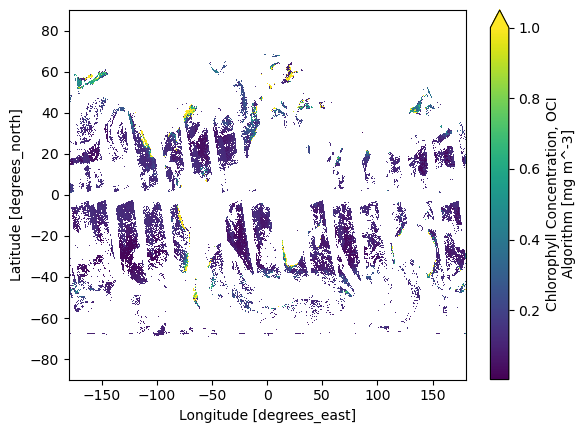

In [5]:
df.chlor_a.plot(vmax=1)

<font size="4"> *Provide some text on what we're seeing above*

<font size="4"> Let's zoom in a little by subsetting the data

In [6]:
rrs_xds_subset = df.where(
    (df["lon"] >= -80) &
    (df["lon"] <= -50) &
    (df["lat"] >= 20) &
    (df["lat"] <= 50),
    drop=True)
#rrs_xds_subset

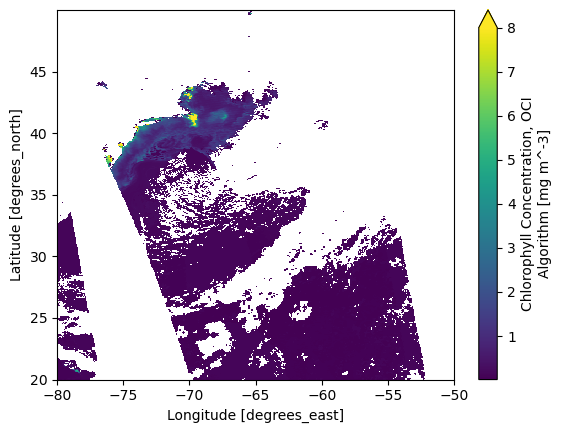

In [7]:
rrs_xds_subset.chlor_a.plot(vmax=8)

<font size="4"> And maybe a little bit more?

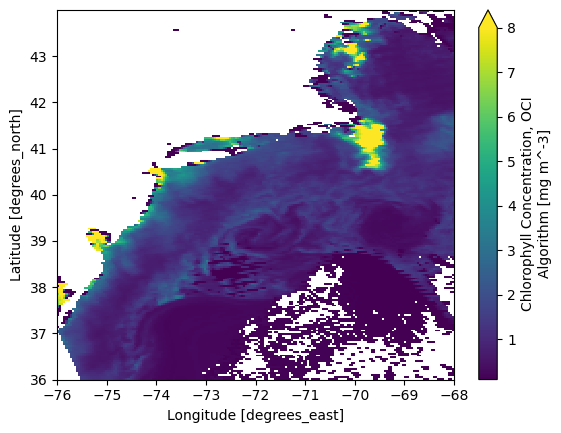

In [16]:
rrs_xds_subset = df.where(
    (df["lon"] >= -76) &
    (df["lon"] <= -68) &
    (df["lat"] >= 36) &
    (df["lat"] <= 44),
    drop=True)
rrs_xds_subset.chlor_a.plot(vmax=8)

<font size="4"> Now we can start to see interesting features in the 4km mapped chlor_a product